Problem statement:

- To build and compare several customer churn prediction models

In [7]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_csv("customerchurn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Preprocessing:

In [9]:
pd.set_option('display.max_columns',None)
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
745,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No
1711,9964-WBQDJ,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.40,1725.4,No
3370,5307-UVGNB,Female,0,Yes,Yes,53,No,No phone service,DSL,Yes,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),48.70,2495.2,No
360,9294-TDIPC,Male,0,No,Yes,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,83.75,No
2552,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,26.90,1250.85,No
6734,8182-PNAGI,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),50.25,593.75,Yes
217,0230-WEQUW,Male,0,Yes,No,66,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),56.60,3789.2,No
6254,9933-QRGTX,Female,0,Yes,No,60,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,97.20,5611.75,No
6572,6258-PVZWJ,Male,0,Yes,No,68,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.80,6302.85,No
1099,6921-OZMFH,Male,0,Yes,Yes,5,Yes,Yes,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,55.70,259.4,No


In [27]:
#lets first check for missing values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- so dataset has no missing values

In [10]:
#checking for datatype

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observation:
- TotalCharges is of object datatype, while it should be of float dtype

In [47]:
#variable TotalCharges has empty string present, also this variable should be of float type so we will convert it after replacing the empty string with nan value

df.replace(' ',np.nan,inplace=True)

In [52]:
#now again checking for missing values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [53]:
#importing some libraries

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

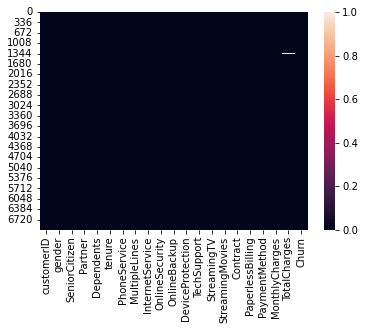

In [54]:
sns.heatmap(df.isnull())

- so now TotalCharges have some missing values present, as the datatype of this variable is object, so we will use SimpleImputer with strategy as most_frequent
- after imputation, we will convert it to float datatype

In [55]:
from sklearn.impute import SimpleImputer

df['TotalCharges']=SimpleImputer(strategy='most_frequent').fit_transform(df['TotalCharges'].values.reshape(-1,1))

df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [56]:
#now checking for missing values and datatype

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

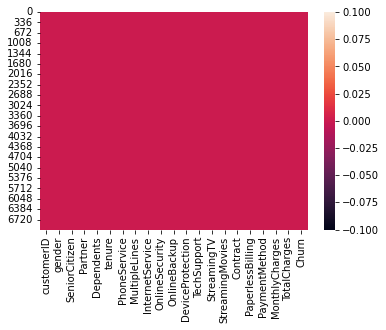

In [58]:
sns.heatmap(df.isnull())

In [57]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- TotalCharges dtype has been converted

In [59]:
#checking the value counts of the variables classes

for i in df.columns:
    print(df[i].value_counts(),'\n\n')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 


Male      3555
Female    3488
Name: gender, dtype: int64 


0    5901
1    1142
Name: SeniorCitizen, dtype: int64 


No     3641
Yes    3402
Name: Partner, dtype: int64 


No     4933
Yes    2110
Name: Dependents, dtype: int64 


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 


Yes    6361
No      682
Name: PhoneService, dtype: int64 


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 


N

- okay so except fopr 'customerID' which has 7043 unique values all the other variables would be easy to encode

- Now we will do EDA, later on we will perform label encoding on the object dtype variables

# EDA:

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


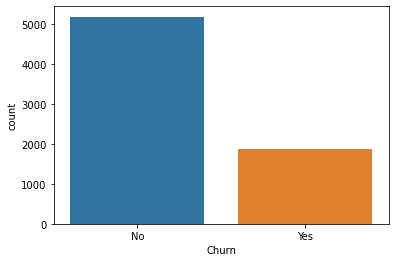

In [67]:
sns.countplot(df['Churn'])
plt.show()

- The data is imbalanced as No class has more counts than Yes class

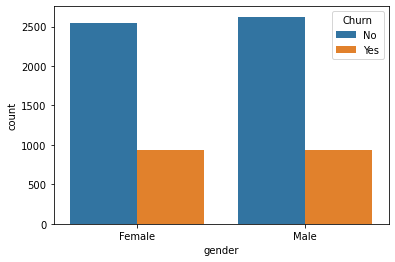

In [68]:
sns.countplot(df['gender'],hue=df['Churn'])
plt.show()

- the count for both males and females is almost equal in the dataset

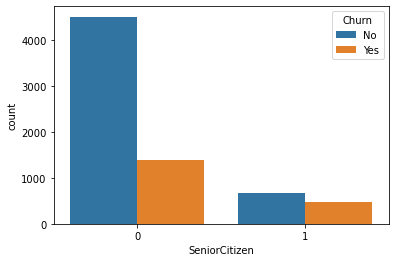

In [69]:
sns.countplot(df['SeniorCitizen'],hue=df['Churn'])
plt.show()

- Less senior citizens are present
- more numbers of No No senior citizen have churn Yes

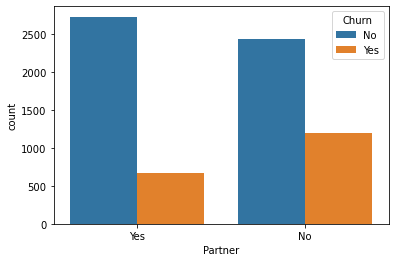

In [71]:
sns.countplot(df['Partner'],hue=df['Churn'])
plt.show()

- More customers are not partners
- No partners have higher churn rate

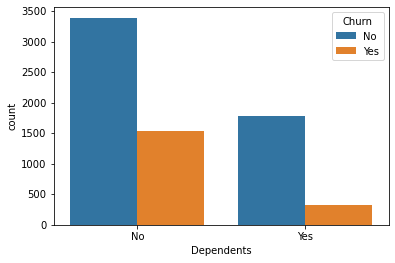

In [72]:
sns.countplot(df['Dependents'],hue=df['Churn'])
plt.show()

- More independent customers are there
-  dependent customers have low churn rate

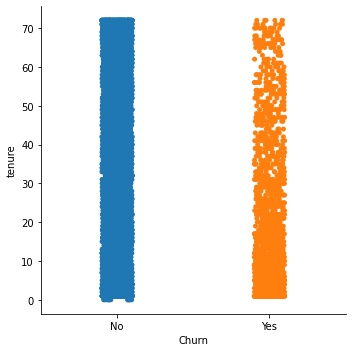

In [74]:
sns.catplot('Churn','tenure',data=df)
plt.show()

- Tenure greater than 40 have less churn rate than tenure lesser than 20

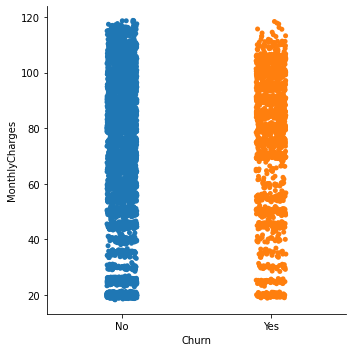

In [75]:
sns.catplot('Churn','MonthlyCharges',data=df)
plt.show()

- at higher monthly charges churn rate is higher

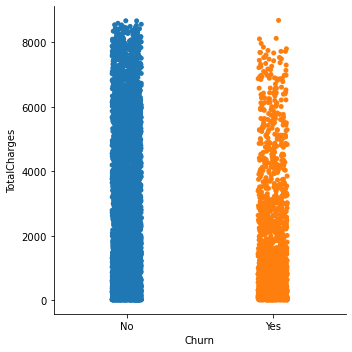

In [76]:
sns.catplot('Churn','TotalCharges',data=df)
plt.show()

- at higher total Charges churn rate is higher

In [77]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [78]:
#as now rest of feature variables are of object dtype we are going to create a function that returns countplot

def count(i):
    plt.figure(figsize=(8,5))
    sns.countplot(df[i],hue=df['Churn'])
    plt.show()

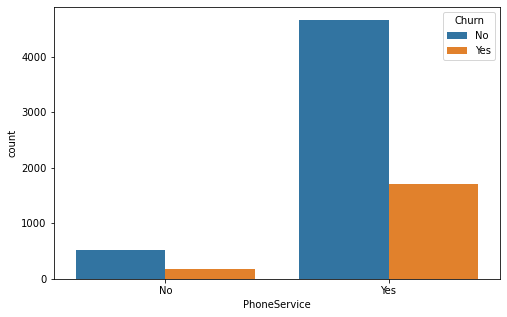

In [80]:
count('PhoneService')

- most customers have PhoneService

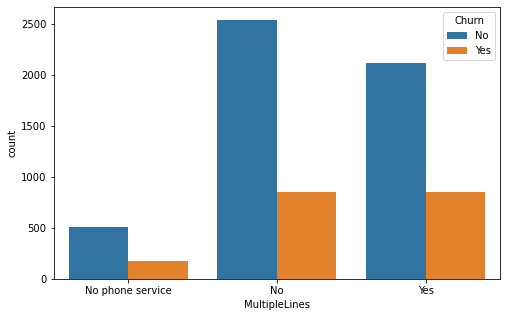

In [81]:
count('MultipleLines')

- most cutomers have no 'MultipleLines'
- for Both No and Yes 'MultipleLines' churn rate is similar

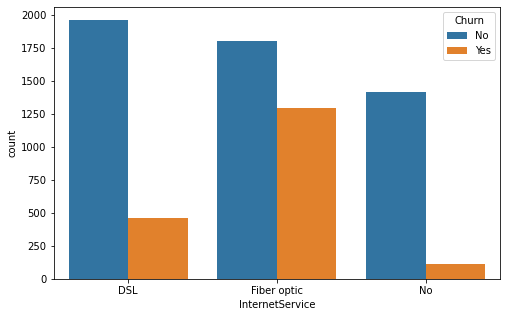

In [82]:
count('InternetService')

- most cutomers have DSL and Fiber Optic 'InternetService' but the churn rate of Fiber optic 'InternetService' is very high than DSL and No 'InternetService'

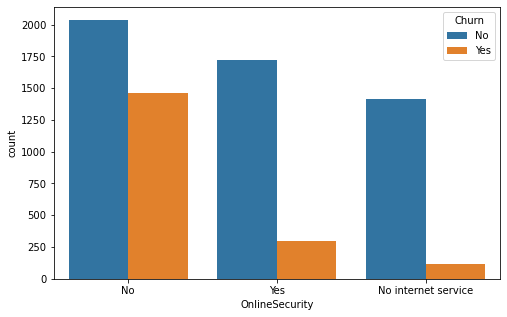

In [83]:
count('OnlineSecurity')

- No 'OnlineSecurity' cutomers have higher churn rate while Yes 'OnlineSecurity' and No internet service have very low churn

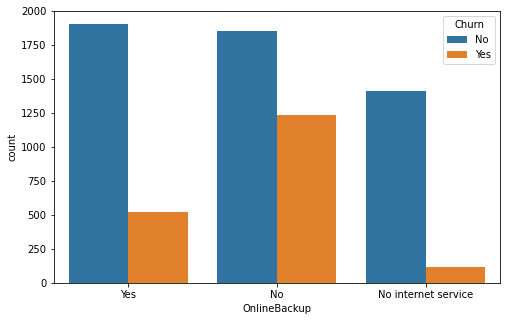

In [84]:
count('OnlineBackup')

- No 'OnlineBackup' has high churn 

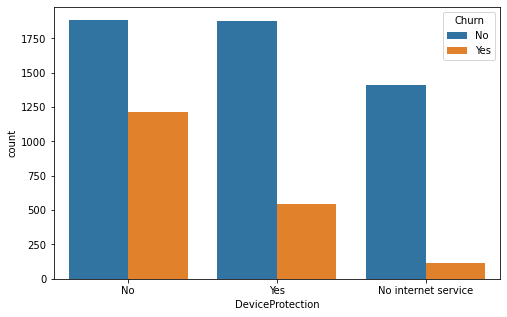

In [85]:
count('DeviceProtection')

- No 'DeviceProtection' has higher Churn

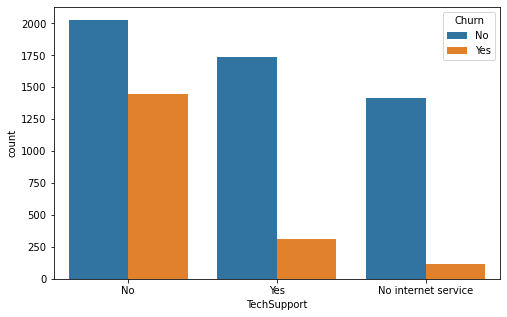

In [86]:
count('TechSupport')

- No 'TechSupport' has higher Churn

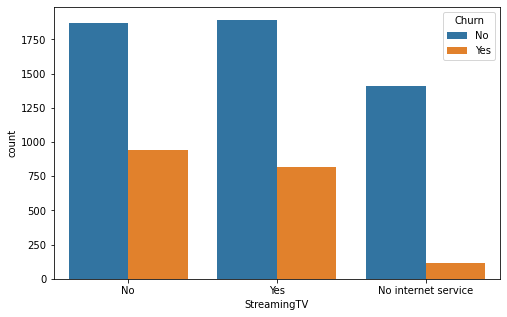

In [87]:
count('StreamingTV')

- both No and Yes 'StreamingTV' have almost same churns

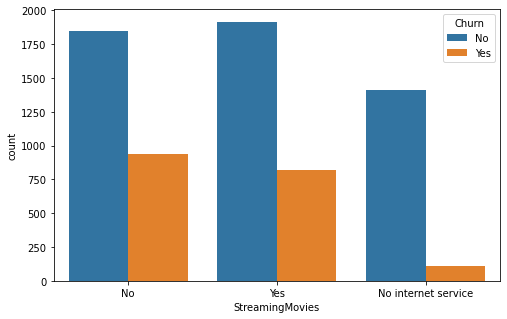

In [88]:
count('StreamingMovies')

- both No and Yes 'StreamingMovies' have almost same churns

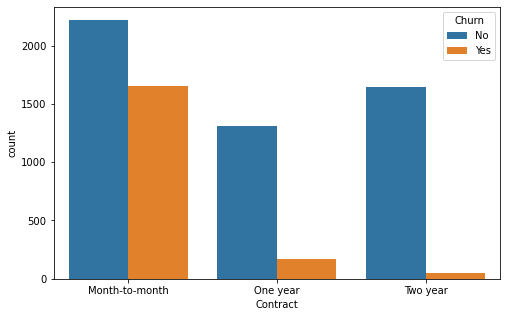

In [89]:
count('Contract')

- Month-to-month 'Contract' have very high Churn as compared to One year and Two year 'Contract'

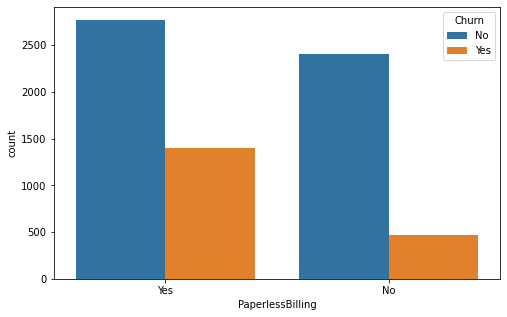

In [90]:
count('PaperlessBilling')

- More Paperless billing has more churns

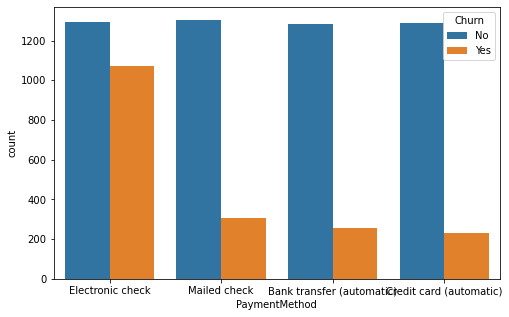

In [91]:
count('PaymentMethod')

- Electronic check 'PaymentMethod' has very high churns than Mailed check , bank transfer and credit card 'PaymentMethod'


In [92]:
#now lets LabelEncode the object datatype variables

cat=[]  #creating an empty list for categorical variables
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        pass
    

# now removing customerID, as this variable has all unique values so it would be tricky to encode it

cat.remove('customerID')

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])
    
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1666,8388-DMKAE,0,0,0,0,8,1,0,2,1,1,1,1,1,1,2,0,3,20.25,174.65,0


In [94]:
#now checking for dtypes

df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [95]:
#dropping cutomerID

df.drop('customerID',axis=1,inplace=True)

In [96]:
#checking for correlation

df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000079,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103001,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317518,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062100,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826172,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113211,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452583,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175753,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253235,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374421,-0.195525


In [97]:
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198335
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Conclusion:
- MonthlyCharges , PaperLessBilling , SeniorCitizen , PaymentMethod have good correlation bond with the target variable
- MultipleLines , PhoneService have weak correlation bond with target variable
- all the left variables have negative correlation bond with target variable

<Figure size 432x288 with 0 Axes>

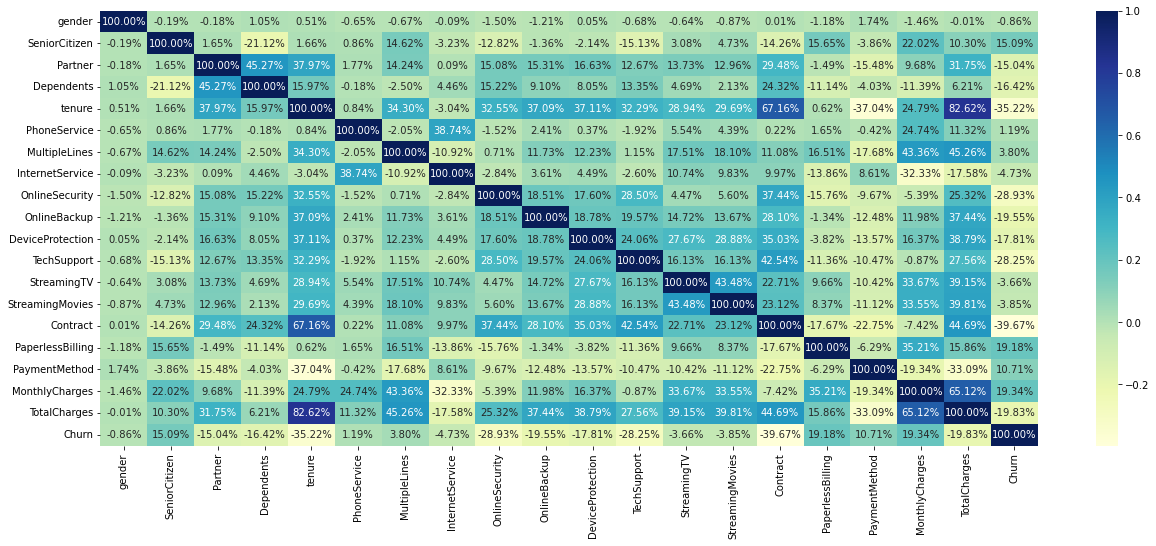

<Figure size 432x288 with 0 Axes>

In [98]:
plt.figure(figsize=(21,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2%')
plt.figure()

In [99]:
# now let's, describe our dataset:

df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.765853,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.762876,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


- skewness might be present as some variables mean value is greater or lesser than their median values
-  more most variables outliers might not be present dues to limited classes present
- the range for almost all variables is quiet low

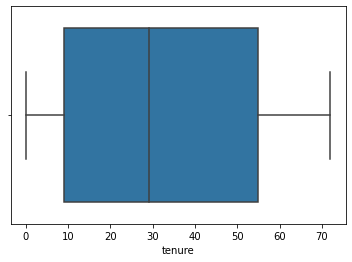

In [101]:
#let's check for outliers

sns.boxplot(df['tenure'])
plt.show()

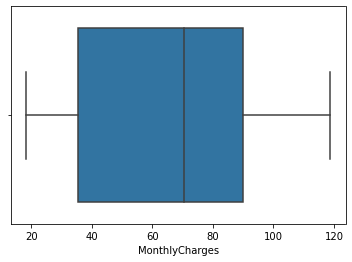

In [102]:
sns.boxplot(df['MonthlyCharges'])
plt.show()

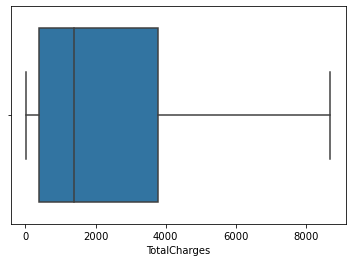

In [103]:
sns.boxplot(df['TotalCharges'])
plt.show()

# Data Cleaning:

In [104]:
#lets check out for outliers using zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

#threhold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [105]:
#so outliers are present, so we are going to see how much data is being lost

df_new=df[(z<3).all(axis=1)]

In [106]:
df.shape

(7043, 20)

In [107]:
df_new.shape

(6361, 20)

In [108]:
print('Data Loss is:',(7043-6361)/7043*100,'%')

Data Loss is: 9.683373562402386 %


- so data loss is less than 10%, so we will use dataset with no outliers, as due to imbalance data we are going to do over sampling later

In [110]:
# now selecting our feature and target variable for further process

x=df_new.drop('Churn',axis=1)
y=df_new['Churn']

print(x.shape)
print(y.shape)

(6361, 19)
(6361,)


In [117]:
#checking for skewness

x.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges        0.900393
dtype: float64

- threshold = -/+ 0.50 , so SeniorCitizen , Dependents , Contract , TotalCharges are exceeding the threshold limit, we will try to reduce skewness with power_transform method

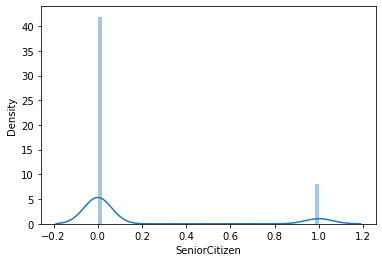

In [118]:
sns.distplot(df['SeniorCitizen'])
plt.show()

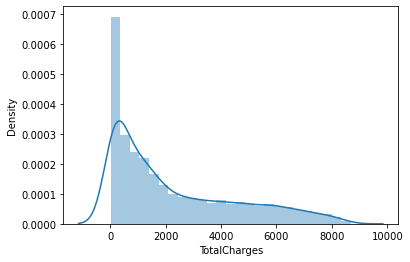

In [119]:
sns.distplot(df['TotalCharges'])
plt.show()

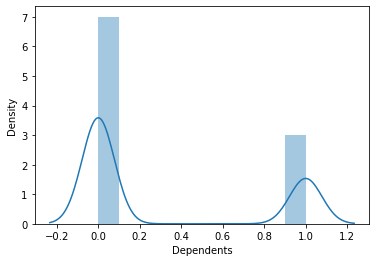

In [120]:
sns.distplot(df['Dependents'])
plt.show()

- the data is imbalanced for some variables thats why skewness is there

In [122]:
#using power_transform method

from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'])
x.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure             -0.243524
PhoneService        0.000000
MultipleLines       0.132058
InternetService    -0.108986
OnlineSecurity      0.131110
OnlineBackup       -0.023610
DeviceProtection   -0.014523
TechSupport         0.123477
StreamingTV        -0.122478
StreamingMovies    -0.126613
Contract            0.301765
PaperlessBilling   -0.386613
PaymentMethod      -0.207901
MonthlyCharges     -0.331859
TotalCharges       -0.149452
dtype: float64

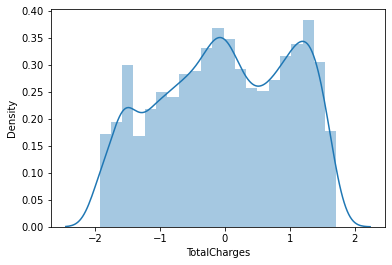

In [124]:
sns.distplot(x['TotalCharges'])
plt.show()

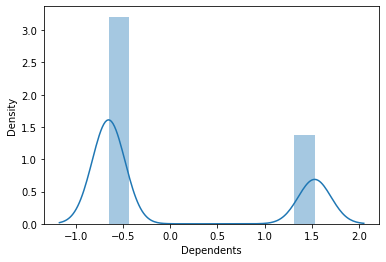

In [125]:
sns.distplot(x['Dependents'])
plt.show()

- the skewnesss has been reduced upto some extent

In [126]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [127]:
vif_calc()

    VIF Factor          features
0     1.001906            gender
1     1.152849     SeniorCitizen
2     1.468116           Partner
3     1.384518        Dependents
4    41.413310            tenure
5          NaN      PhoneService
6     1.409040     MultipleLines
7     1.698310   InternetService
8     1.340613    OnlineSecurity
9     1.217116      OnlineBackup
10    1.305294  DeviceProtection
11    1.403960       TechSupport
12    1.443696       StreamingTV
13    1.445687   StreamingMovies
14    2.511665          Contract
15    1.215684  PaperlessBilling
16    1.179855     PaymentMethod
17   11.565568    MonthlyCharges
18   57.624659      TotalCharges


- 3 variables have vif greater than range 4-10, so we will drop the variable with high vif and low correlation for reducing multicollinearity

In [128]:
df_new.corr()['Churn']

gender             -0.011212
SeniorCitizen       0.148802
Partner            -0.154692
Dependents         -0.159481
tenure             -0.349681
PhoneService             NaN
MultipleLines       0.040207
InternetService    -0.059137
OnlineSecurity     -0.290086
OnlineBackup       -0.202671
DeviceProtection   -0.177710
TechSupport        -0.280404
StreamingTV        -0.036029
StreamingMovies    -0.041903
Contract           -0.397067
PaperlessBilling    0.196368
PaymentMethod       0.103970
MonthlyCharges      0.216816
TotalCharges       -0.193775
Churn               1.000000
Name: Churn, dtype: float64

In [129]:
#dropping TotalCharges

x.drop('TotalCharges',axis=1,inplace=True)

#now checking for VIF

vif_calc()

    VIF Factor          features
0     1.001843            gender
1     1.152802     SeniorCitizen
2     1.468110           Partner
3     1.384442        Dependents
4     2.621278            tenure
5          NaN      PhoneService
6     1.408747     MultipleLines
7     1.477634   InternetService
8     1.336128    OnlineSecurity
9     1.214003      OnlineBackup
10    1.301420  DeviceProtection
11    1.397659       TechSupport
12    1.441703       StreamingTV
13    1.445276   StreamingMovies
14    2.363900          Contract
15    1.215054  PaperlessBilling
16    1.177636     PaymentMethod
17    2.437063    MonthlyCharges


- multicollinearity has been reduced

In [130]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [131]:
#now checking if the dataset is imbalanced or not

y.value_counts()

0    4662
1    1699
Name: Churn, dtype: int64

- data is imabalanced, so we will use SMOTE

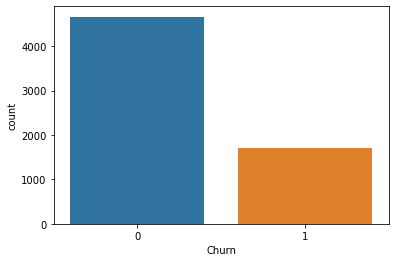

In [132]:
sns.countplot(y)
plt.show()

In [133]:
from imblearn.over_sampling import SMOTE

train_x,train_y=SMOTE().fit_resample(x,y)

print(train_x.shape)
print(train_y.shape)

(9324, 18)
(9324,)


In [134]:
#since this is binary classification problem first we will use LogisticRegression then we will try out some other algos too

In [135]:
#importing libraries

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [136]:
lr=LogisticRegression()

In [137]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(accuracy_score(y_test,predlr)*100,1)==round(accuracy_score(y_train,predtrain)*100,1):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',accuracy_score(y_train,predtrain)*100)
        print('Testing accuracy score is',accuracy_score(y_test,predlr)*100,'\n')

At random state 0 the model performs very well
At random state 0 :
Training accuracy score is 77.87312289304322
Testing accuracy score is 77.87705503931379 

At random state 7 the model performs very well
At random state 7 :
Training accuracy score is 77.75053631627337
Testing accuracy score is 77.80557541100787 

At random state 21 the model performs very well
At random state 21 :
Training accuracy score is 77.84247624885076
Testing accuracy score is 77.80557541100787 

At random state 29 the model performs very well
At random state 29 :
Training accuracy score is 77.93441618142813
Testing accuracy score is 77.87705503931379 

At random state 32 the model performs very well
At random state 32 :
Training accuracy score is 77.79650628256206
Testing accuracy score is 77.7698355968549 

At random state 37 the model performs very well
At random state 37 :
Training accuracy score is 77.90376953723566
Testing accuracy score is 77.91279485346676 

At random state 38 the model performs very we

In [138]:
#using 37 as the random state for further process

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=37,test_size=.30)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))

0.7791279485346676


In [139]:
print(accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

77.91279485346676
[[1070  352]
 [ 266 1110]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1422
           1       0.76      0.81      0.78      1376

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



In [140]:
#importing metrics

from sklearn.metrics import mean_squared_error

#checking error for LogiosticRegression
mselr=mean_squared_error(y_test,predlr)

print(mselr)

0.22087205146533237


In [141]:
#checking cross validation score for logistic regression

for j in range(2,10):
    lrs=cross_val_score(lr,train_x,train_y,cv=j)
    lrc=lrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrc*100)
    print('Accuracy score is:',accuracy_score(y_test,predlr)*100,'\n')

At cv= 2
Cross Validation Score is: 77.60617760617761
Accuracy score is: 77.91279485346676 

At cv= 3
Cross Validation Score is: 77.62762762762763
Accuracy score is: 77.91279485346676 

At cv= 4
Cross Validation Score is: 77.62762762762763
Accuracy score is: 77.91279485346676 

At cv= 5
Cross Validation Score is: 77.65996041836864
Accuracy score is: 77.91279485346676 

At cv= 6
Cross Validation Score is: 77.67052767052766
Accuracy score is: 77.91279485346676 

At cv= 7
Cross Validation Score is: 77.75632775632776
Accuracy score is: 77.91279485346676 

At cv= 8
Cross Validation Score is: 77.74590691922056
Accuracy score is: 77.91279485346676 

At cv= 9
Cross Validation Score is: 77.77777777777779
Accuracy score is: 77.91279485346676 



- as both cross validation score and accuracy score are coming out be so close, the model is working well

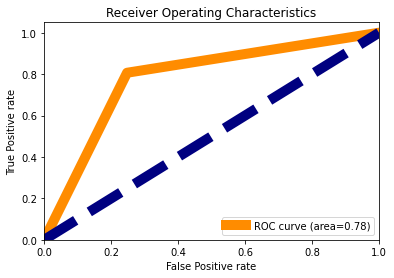

In [142]:
#roc auc plotting for logisticRegression

from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds=roc_curve(y_test,predlr)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [143]:
#now lets try some more classifcation algorithms 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


#KNeighbors

knn=KNeighborsClassifier()

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=37,test_size=.30)
knn.fit(x_train,y_train)
predtrain=knn.predict(x_train)
predknn=knn.predict(x_test)

print(accuracy_score(y_test,predknn)*100)

77.94853466761973


In [144]:
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

77.94853466761973
[[ 947  475]
 [ 142 1234]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.75      1422
           1       0.72      0.90      0.80      1376

    accuracy                           0.78      2798
   macro avg       0.80      0.78      0.78      2798
weighted avg       0.80      0.78      0.78      2798



- The recall of KNeighborsClassifier is poorer as compared to LogisticRegression, though their accuracy are similar

In [145]:
#checking erro for KNeighbors

mseknn=mean_squared_error(y_test,predknn)

print(mseknn)

0.2205146533238027


In [147]:
#checking cross validation score for KNeighbors

for j in range(2,10):
    knns=cross_val_score(knn,train_x,train_y,cv=j)
    knnc=knns.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',knnc*100)
    print('Accuracy score is:',accuracy_score(y_test,predknn)*100,'\n')

At cv= 2
Cross Validation Score is: 78.30330330330331
Accuracy score is: 77.94853466761973 

At cv= 3
Cross Validation Score is: 79.38652938652938
Accuracy score is: 77.94853466761973 

At cv= 4
Cross Validation Score is: 79.16130416130416
Accuracy score is: 77.94853466761973 

At cv= 5
Cross Validation Score is: 79.70840764477786
Accuracy score is: 77.94853466761973 

At cv= 6
Cross Validation Score is: 79.56885456885458
Accuracy score is: 77.94853466761973 

At cv= 7
Cross Validation Score is: 79.53667953667953
Accuracy score is: 77.94853466761973 

At cv= 8
Cross Validation Score is: 79.78373294856411
Accuracy score is: 77.94853466761973 

At cv= 9
Cross Validation Score is: 79.6010296010296
Accuracy score is: 77.94853466761973 



- the model is slightly underfitting with KNeighbors

In [148]:
#decisonTree

dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=37,test_size=.30)
dtc.fit(x_train,y_train)
predtrain=dtc.predict(x_train)
preddtc=dtc.predict(x_test)

print(accuracy_score(y_test,preddtc)*100)

78.44889206576126


In [149]:
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

78.44889206576126
[[1102  320]
 [ 283 1093]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1422
           1       0.77      0.79      0.78      1376

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



- the recall is good with DecisionTreeClassifier for both Churn classes 

In [150]:
#checking error for DecisionTree

msedtc=mean_squared_error(y_test,preddtc)

print(msedtc)

0.21551107934238742


In [151]:
#checking cross validation score for DecsionTree

for j in range(2,10):
    dtcs=cross_val_score(dtc,train_x,train_y,cv=j)
    dtcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',dtcc*100)
    print('Accuracy score is:',accuracy_score(y_test,preddtc)*100,'\n')

At cv= 2
Cross Validation Score is: 77.19862719862721
Accuracy score is: 78.44889206576126 

At cv= 3
Cross Validation Score is: 77.54182754182753
Accuracy score is: 78.44889206576126 

At cv= 4
Cross Validation Score is: 78.14242814242814
Accuracy score is: 78.44889206576126 

At cv= 5
Cross Validation Score is: 78.35740832364888
Accuracy score is: 78.44889206576126 

At cv= 6
Cross Validation Score is: 78.46417846417847
Accuracy score is: 78.44889206576126 

At cv= 7
Cross Validation Score is: 78.24967824967824
Accuracy score is: 78.44889206576126 

At cv= 8
Cross Validation Score is: 79.23815141454222
Accuracy score is: 78.44889206576126 

At cv= 9
Cross Validation Score is: 78.9039039039039
Accuracy score is: 78.44889206576126 



In [152]:
#SVC

svc=SVC()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=37,test_size=.30)
svc.fit(x_train,y_train)
predtrain=svc.predict(x_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc)*100)

81.0578984989278


In [153]:
print(accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

81.0578984989278
[[1101  321]
 [ 209 1167]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1422
           1       0.78      0.85      0.81      1376

    accuracy                           0.81      2798
   macro avg       0.81      0.81      0.81      2798
weighted avg       0.81      0.81      0.81      2798



- the recall is poor for SVC but it has higher accuracy

In [154]:
#checking error for SVC

msesvc=mean_squared_error(y_test,predsvc)

print(msesvc)

0.18942101501072195


In [156]:
#checking cross validation score for SVC

for j in range(2,6):
    svcs=cross_val_score(svc,train_x,train_y,cv=j)
    svcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',svcc*100)
    print('Accuracy score is:',accuracy_score(y_test,predsvc)*100,'\n')

At cv= 2
Cross Validation Score is: 78.9039039039039
Accuracy score is: 81.0578984989278 

At cv= 3
Cross Validation Score is: 78.9039039039039
Accuracy score is: 81.0578984989278 

At cv= 4
Cross Validation Score is: 78.9039039039039
Accuracy score is: 81.0578984989278 

At cv= 5
Cross Validation Score is: 78.9039039039039
Accuracy score is: 81.0578984989278 



# Ensemble:

In [157]:
#now, let's try some ensemble techniques:

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [158]:
#RandomForestClassifier

rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=37,test_size=.30)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf)*100)

85.9542530378842


In [159]:
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

85.9542530378842
[[1212  210]
 [ 183 1193]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1422
           1       0.85      0.87      0.86      1376

    accuracy                           0.86      2798
   macro avg       0.86      0.86      0.86      2798
weighted avg       0.86      0.86      0.86      2798



- the recall is excellent with RandomForestClassifier , the accuracy score has also been improved

In [160]:
#checking error for RandomForest

mserf=mean_squared_error(y_test,predrf)

print(mserf)

0.14045746962115796


In [162]:
#checking cross validation score for RandomForest

for j in range(2,7):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100)
    print('Accuracy score is:',accuracy_score(y_test,predrf)*100,'\n')

At cv= 2
Cross Validation Score is: 83.27970827970827
Accuracy score is: 85.9542530378842 

At cv= 3
Cross Validation Score is: 84.42728442728443
Accuracy score is: 85.9542530378842 

At cv= 4
Cross Validation Score is: 84.94208494208495
Accuracy score is: 85.9542530378842 

At cv= 5
Cross Validation Score is: 84.96411764029041
Accuracy score is: 85.9542530378842 

At cv= 6
Cross Validation Score is: 85.27456027456027
Accuracy score is: 85.9542530378842 



In [163]:
#AdaBoostClassifier

ada=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=37,test_size=.30)
ada.fit(x_train,y_train)
predtrain=ada.predict(x_train)
predada=ada.predict(x_test)

print(accuracy_score(y_test,predada)*100)

81.20085775553967


In [164]:
print(accuracy_score(y_test,predada)*100)
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

81.20085775553967
[[1077  345]
 [ 181 1195]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.80      1422
           1       0.78      0.87      0.82      1376

    accuracy                           0.81      2798
   macro avg       0.82      0.81      0.81      2798
weighted avg       0.82      0.81      0.81      2798



- the recall is poor with AdaBoost

In [165]:
#checking error for AdaBoost

mseada=mean_squared_error(y_test,predada)

print(mseada)

0.1879914224446033


In [166]:
#checking cross validation score for AdaBoost

for j in range(2,6):
    adas=cross_val_score(ada,train_x,train_y,cv=j)
    adac=adas.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',adac*100)
    print('Accuracy score is:',accuracy_score(y_test,predada)*100,'\n')

At cv= 2
Cross Validation Score is: 79.93350493350493
Accuracy score is: 81.20085775553967 

At cv= 3
Cross Validation Score is: 80.26598026598025
Accuracy score is: 81.20085775553967 

At cv= 4
Cross Validation Score is: 80.99528099528101
Accuracy score is: 81.20085775553967 

At cv= 5
Cross Validation Score is: 80.70607186827601
Accuracy score is: 81.20085775553967 



In [167]:
#GradientBoostingClassifier

gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=37,test_size=.30)
gb.fit(x_train,y_train)
predtrain=gb.predict(x_train)
predgb=gb.predict(x_test)

print(accuracy_score(y_test,predgb)*100)

84.16726233023589


In [168]:
print(accuracy_score(y_test,predgb)*100)
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

84.16726233023589
[[1150  272]
 [ 171 1205]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1422
           1       0.82      0.88      0.84      1376

    accuracy                           0.84      2798
   macro avg       0.84      0.84      0.84      2798
weighted avg       0.84      0.84      0.84      2798



- recall is poor

In [169]:
msegb=mean_squared_error(y_test,predgb)

print(msegb)

0.15832737669764116


In [170]:
#checking cross validation score for GradientBoosting

for j in range(2,6):
    gbs=cross_val_score(gb,train_x,train_y,cv=j)
    gbc=gbs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',gbc*100)
    print('Accuracy score is:',accuracy_score(y_test,predgb)*100,'\n')

At cv= 2
Cross Validation Score is: 80.69498069498069
Accuracy score is: 84.16726233023589 

At cv= 3
Cross Validation Score is: 82.16430716430717
Accuracy score is: 84.16726233023589 

At cv= 4
Cross Validation Score is: 83.03303303303304
Accuracy score is: 84.16726233023589 

At cv= 5
Cross Validation Score is: 83.1408312142586
Accuracy score is: 84.16726233023589 



In [171]:
from sklearn.metrics import accuracy_score as acs

algodf=pd.DataFrame({'Mean Squared Error':[mselr,mseknn,msedtc,msesvc,mseada,msegb,mserf],'Accuracy Score':[acs(y_test,predlr),acs(y_test,predknn),acs(y_test,preddtc),acs(y_test,predsvc),acs(y_test,predada),acs(y_test,predgb),acs(y_test,predrf)]},index=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC','AdaBoostClassifer','GradientBoostingClassifier','RabdomForestClassifier'])
algodf

,Mean Squared Error,Accuracy Score
LogisticRegression,0.220872,0.779128
KNeighborsClassifier,0.220515,0.779485
DecisionTreeClassifier,0.215511,0.784489
SVC,0.189421,0.810579
AdaBoostClassifer,0.187991,0.812009
GradientBoostingClassifier,0.158327,0.841673
RabdomForestClassifier,0.140457,0.859543


Conclusion:
- The model is working well with all the algorithms we have tried above
- The models accuracy scores are coming out to be in range 75-85
- All models cross validation is around their accuracy scores only so the model is working well
- RandomForestClassifier is giving us the best accuracy score , lowest error , high precision and great recall

In [172]:
#doing hyperparametertuning on RandomForest for best results

from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
parameters={'criterion':["gini", "entropy"],'max_features':['sqrt','log2','auto']}
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=37,test_size=.30)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt'}


In [188]:
#finding a good random state

for i in range(50,60):
    rf=RandomForestClassifier(criterion='entropy',max_features='sqrt')
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    
    print('At random state:',i)
    print(accuracy_score(y_test,predrf)*100,'\n')

At random state: 50
85.09649749821301 

At random state: 51
84.06004288777699 

At random state: 52
86.70478913509649 

At random state: 53
85.02501786990707 

At random state: 54
85.02501786990707 

At random state: 55
85.38241601143675 

At random state: 56
85.27519656897783 

At random state: 57
86.13295210864904 

At random state: 58
85.6325947105075 

At random state: 59
85.6325947105075 



In [199]:
#using the random state as 57

rf=RandomForestClassifier(criterion='entropy', max_features= 'sqrt')
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=57,test_size=.30)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)

86.13295210864904


In [173]:
#checking for cross validation score

rf=RandomForestClassifier(criterion='entropy',max_features='sqrt')
for j in range(2,21):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100,'\n')

At cv= 2
Cross Validation Score is: 83.45130845130845 

At cv= 3
Cross Validation Score is: 84.33075933075934 

At cv= 4
Cross Validation Score is: 84.79193479193479 

At cv= 5
Cross Validation Score is: 84.89979173618381 

At cv= 6
Cross Validation Score is: 85.4139854139854 

At cv= 7
Cross Validation Score is: 85.36036036036036 

At cv= 8
Cross Validation Score is: 85.46970126399636 

At cv= 9
Cross Validation Score is: 85.57486057486057 

At cv= 10
Cross Validation Score is: 85.82493824434539 

At cv= 11
Cross Validation Score is: 85.6093598433377 

At cv= 12
Cross Validation Score is: 85.38181038181038 

At cv= 13
Cross Validation Score is: 85.5562767632557 

At cv= 14
Cross Validation Score is: 85.8000858000858 

At cv= 15
Cross Validation Score is: 85.95366184955634 

At cv= 16
Cross Validation Score is: 85.64205319092501 

At cv= 17
Cross Validation Score is: 86.04095740645586 

At cv= 18
Cross Validation Score is: 85.66066066066065 

At cv= 19
Cross Validation Score is: 85.567

In [181]:
#checking for cross validation score at cv=17

rf=RandomForestClassifier(criterion='entropy', max_features= 'sqrt')
rfs=cross_val_score(rf,train_x,train_y,cv=17)
rfc=rfs.mean()
print('Cross Validation Score is:',rfc*100,'\n')

Cross Validation Score is: 86.07278857456589 



In [201]:
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1439
           1       0.84      0.88      0.86      1359

    accuracy                           0.86      2798
   macro avg       0.86      0.86      0.86      2798
weighted avg       0.86      0.86      0.86      2798

[[1215  224]
 [ 164 1195]]


- Recall is excellent , the model isn't getting biased with RandomForestClassifier

In [202]:
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

Mean Squared Error: 0.13867047891350964
Root Mean Squared Error: 0.37238485322782616


- the errors are close to 0, so the model is working well with great accuracy too

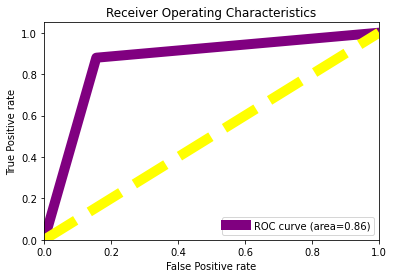

In [203]:
#roc auc plotting


fpr,tpr,thresholds=roc_curve(y_test,predrf)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='purple',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='yellow',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

- The predictive model is working very well than the base model

In [205]:
print('The model is performing extremely well with RandomForestClassifier because we are getting both accuracy score and cross validation score as 86.1','\n')
print('Accuracy:',round(accuracy_score(y_test,predrf)*100,1))
print('Cross Validation Score:',round(rfc*100,1))
print('Area Under Curve:',round(auc(fpr,tpr),3))

The model is performing extremely well with RandomForestClassifier because we are getting both accuracy score and cross validation score as 86.1 

Accuracy: 86.1
Cross Validation Score: 86.1
Area Under Curve: 0.862


In [206]:
preddf=pd.DataFrame({'Fraud Reported':y_test,'Predicted Fraud Reported':predrf})
preddf

,Fraud Reported,Predicted Fraud Reported
77,0,0
1197,0,0
4650,1,1
1461,0,0
3234,0,1
...,...,...
8528,1,1
5421,1,1
2815,0,0
7532,1,0


In [207]:
#saving the best model

import pickle

pickle.dump(rf,open('churn.pkl','wb'))